# Dataset
The following dataset was obtained from Kaggle: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction  

Definitions of each column are included in the 

# Goals

Can we determine what are the most important features that determine whether a customer has a satisfactory or unsatisfactory experience?  

Do those features change among the different flight classes? In other words, do expectations differ if the customer pays for a more 'premium' seating?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
df = pd.read_csv("archive/train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [53]:
print(df.shape)
df.info()

(103904, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding           

The only variable where we need to worry about missing values is "Departure Delay in Minutes"

In [4]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Cleaning and Encoding
Prior to any cleaning, we will just drop the "Unnamed: 0" and "id" columns since they are just identifiers and do not provide any analytical information.

In [5]:
df.drop(["Unnamed: 0", "id"], axis=1, inplace=True)

In [6]:
np.nanpercentile(df['Arrival Delay in Minutes'].values, 95)

79.0

95% of the flights arrived late by at most 79 minutes. Based on the 95th percentile and the maximum delay, it is very rare to have a flight delayed by more than an hour. Half of the flights also arrived on time, so we will just fill in the missing arrival delays with the mean.

In [7]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean(), inplace=True)

In [8]:
nominals = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']

for variable in nominals:
    print('Unique values for {}: {}'.format(variable, df[variable].unique()))

Unique values for Gender: ['Male' 'Female']
Unique values for Customer Type: ['Loyal Customer' 'disloyal Customer']
Unique values for Type of Travel: ['Personal Travel' 'Business travel']
Unique values for Class: ['Eco Plus' 'Business' 'Eco']
Unique values for satisfaction: ['neutral or dissatisfied' 'satisfied']


All the quantitative columns contain no nulls and are within their proper range of values. Nominal columns also contain no missing values and are properly formatted.  

Before moving onto EDA, we will encode the nominal variables. Gender, Customer Type, Type of Travel, and satisfaction will be treated as binary variables. Although satisfaction has the value "neutral or dissatisfied", we will not split it into "neutral" and "dissatisfied" since many companies treat neutral reviews as disatisfactory. For example, Uber treats 4 or less stars as a bad experience. Finally we will encode the Class variable as an ordinal variable, where 1='Eco', 2='Eco Plus', 3='Business'.

In [9]:
# create dictionaries to map values to corresponding column
gender_dict = {'Male':0, 'Female':1}
customer_dict = {'Loyal Customer':1, 'disloyal Customer':0}
travel_dict = {'Personal Travel':0, 'Business travel':1}
class_dict = {'Eco':0, 'Eco Plus':1, 'Business':2}
satisfaction_dict = {'neutral or dissatisfied':0, 'satisfied':1}

mapping_dicts = {
    'Gender':gender_dict,
    'Customer Type':customer_dict,
    'Type of Travel':travel_dict,
    'Class':class_dict,
    'satisfaction':satisfaction_dict
}

for variable in nominals:
    df[variable] = df[variable].map(mapping_dicts[variable])

In [10]:
df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


# EDA

Let's start things off with a typical correlation heatmap to see what variables are correlated with satisfaction. Perhaps there might be some other interesting finds.

<AxesSubplot:>

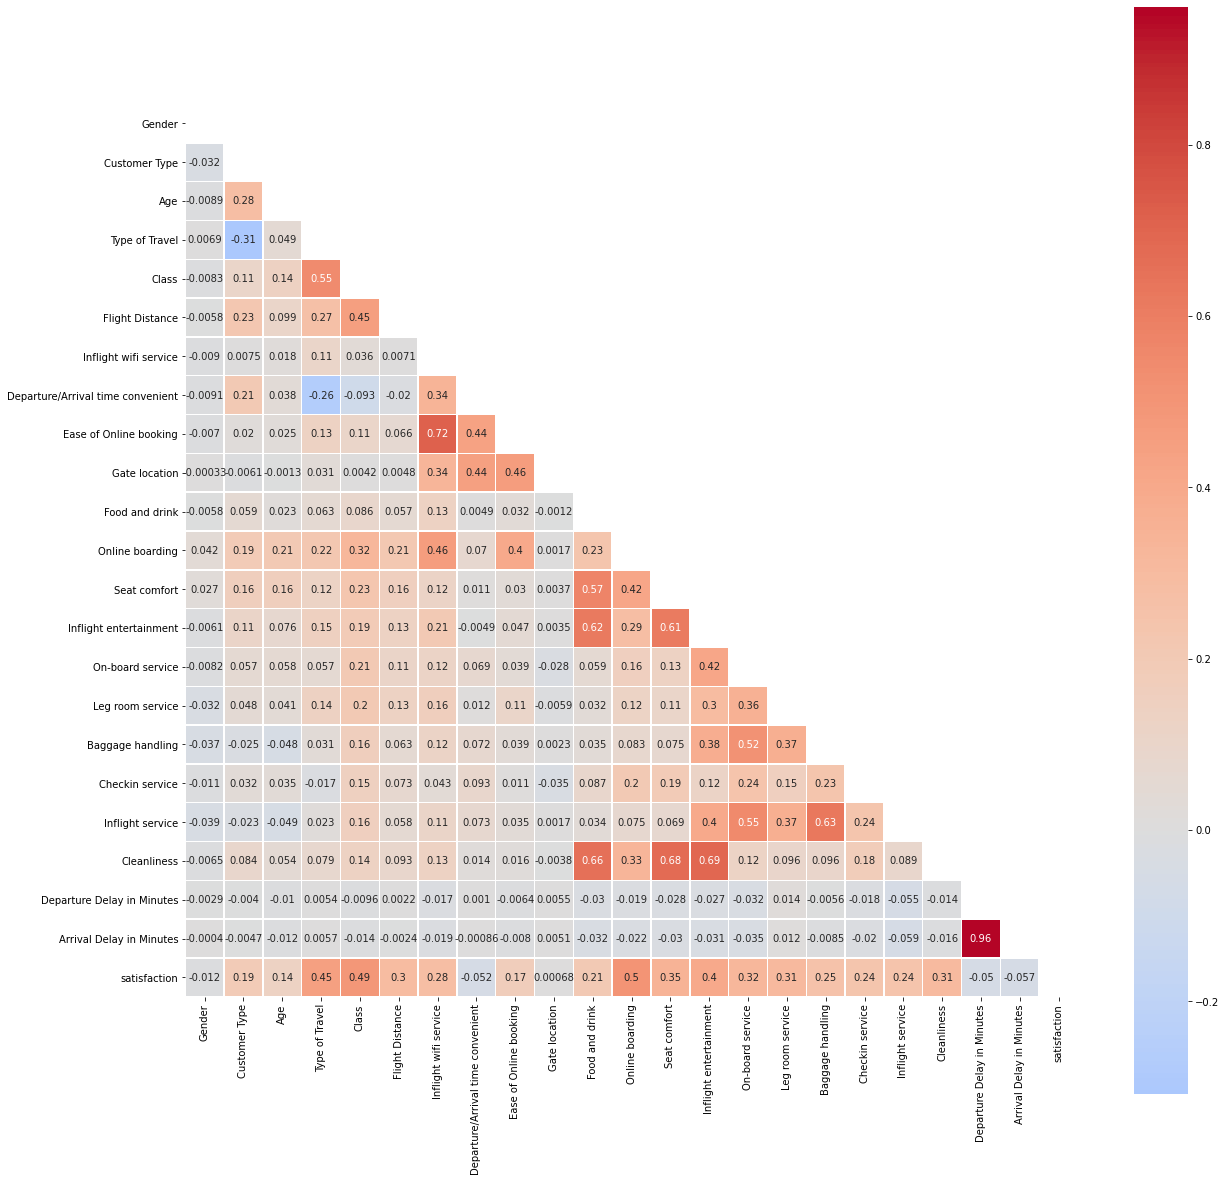

In [11]:
corr = df.corr()
mask = np.triu(corr)

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(corr, annot = True, mask=mask, cmap="coolwarm", center=0,
            square=True, linewidths=.5)

The top 3 variables that are most correlated with satisfaction are:  
1. Online boarding
 * Ease of checking in online means customers save time by not spending as much time at the airport.
2. Class
 * More premium seating tends yield higher satisfaction
3. Type of Travel
 * It appears business trips usually have happier customers. However, this variable is also correlated with Class (business trips -> business class)
 
Cleanliness is also strongly correlated with food and drink, seat comfort, and inflight entertainment. Exceptional hygiene standards most likely means the airline also has high standards for other in-flight services.

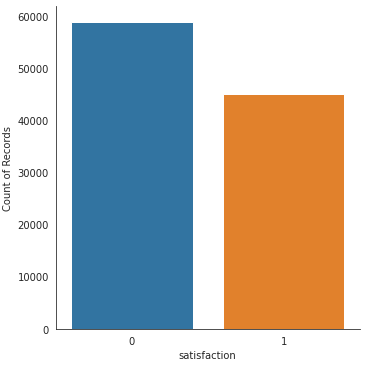

In [54]:
with sns.axes_style('white'):
    g = sns.catplot(
        x="satisfaction",
        data=df,
        kind='count',
    )
    g.set_ylabels('Count of Records')

Roughly 60% all passengers were dissatisfied with their flight.

### Finding the most important features that contribute to satisfaction
Before performing any analysis, I want to make it clear that only variables that can 'easily' be improved upon will be considered. That means arrival/departure delays and gate location will be ignored, since those two are likely outside of the airline's control. And of course, gender, customer type, age, and flight distance are not included since those are dependent on the customer.

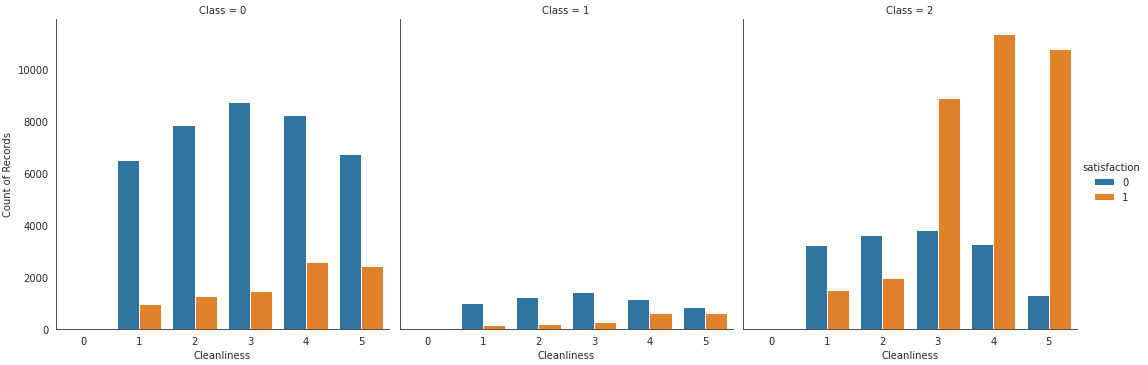

In [13]:
with sns.axes_style('white'):
    g = sns.catplot(
        x="Cleanliness",
        data=df,
        col="Class",
        kind='count',
        hue='satisfaction'
    )
    g.set_ylabels('Count of Records')

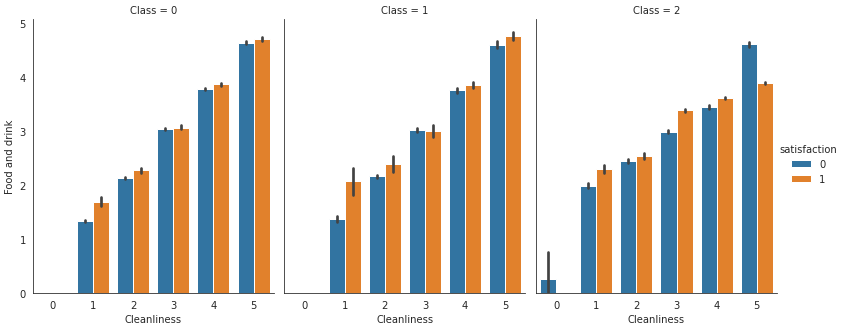

In [14]:
with sns.axes_style('white'):
    g = sns.catplot(
        x="Cleanliness",
        y="Food and drink",
        hue="satisfaction",
        col="Class",
        data=df,
        kind="bar",
        height=4.5, aspect=.8
    )

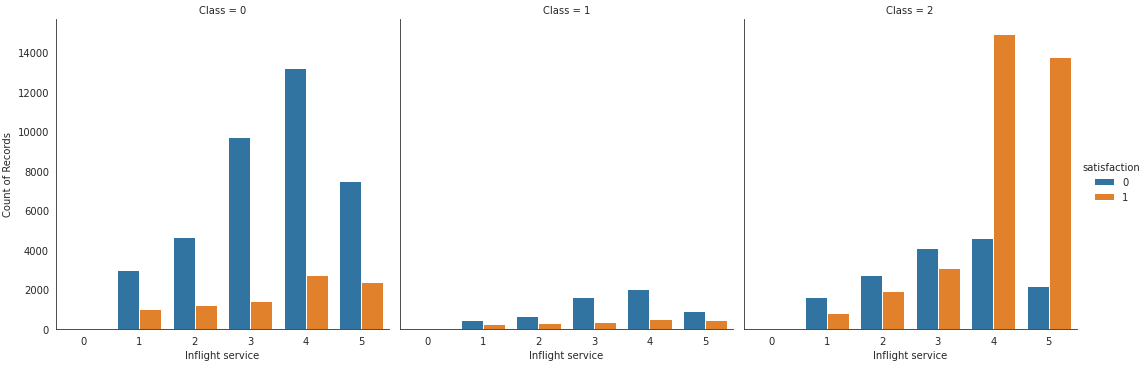

In [15]:
with sns.axes_style('white'):
    g = sns.catplot(
        x="Inflight service",
        data=df,
        col="Class",
        kind='count',
        hue='satisfaction'
    )
    g.set_ylabels('Count of Records')

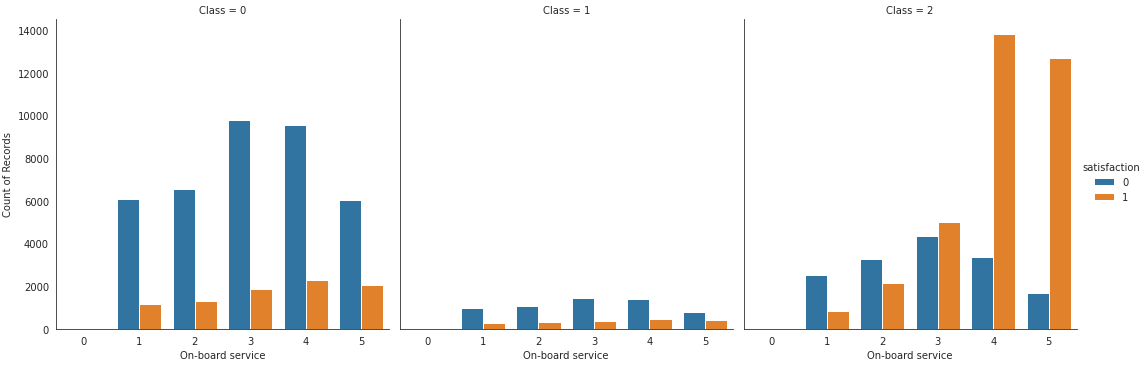

In [16]:
with sns.axes_style('white'):
    g = sns.catplot(
        x="On-board service",
        data=df,
        col="Class",
        kind='count',
        hue='satisfaction'
    )
    g.set_ylabels('Count of Records')

Based on the charts, it seems like those that travel on business class **strongly** value the quality of service and cleanliness provided by the airline. This shouldn't come as a surprise; if you pay top dollar for the best seats in the plane, there is going to be an expectation of luxury.  

Those that travel on economy and economy do not appear to value those qualities as much. Based on personal experience, I am going to claim that seat comfort and inflight wifi service are the best indicators of satisfaction for these 2 groups. Because they are flying via economy, they probably don't expect stellar service. Most people have a smart phone these days, so having good wifi service is crucial. Business class seating probably already have comfortable seats, so economy traveler will value seat comfort more.  

Now let's come up with a way to get the most important features without having to create dozens of visualizations. There are several ways (PCA, chi-square) we can approach this. Since RandomForestClassifiers *generally* have good accuracy, I will just use SKLearn's RandomForestClassifier to automatically select the most important features for each class. As a reminder, features that airlines can't control or fix will be dropped.

In [26]:
eco = df[df['Class']==0]
eco_plus = df[df['Class']==1]
bus = df[df['Class']==2]

In [49]:
# function that uses RandomForestClassifier to determine most important features 
def get_features(data):
    X = data.drop(
        # drop variables that airlines can't 'fix'
        [
            'Gender',
            'Age',
            'Class',
            'Type of Travel',
            'Flight Distance',
            'Departure/Arrival time convenient',
            'Gate location',
            'Departure Delay in Minutes',
            'Arrival Delay in Minutes',
            'satisfaction'
        ],
        axis=1
    )
    y = data['satisfaction']
    
    selector = SelectFromModel(rf(n_estimators=1000, random_state=0))
    selector.fit(X, y)
    support = selector.get_support()
    features = X.loc[:,support].columns.tolist()

    return features

In [50]:
classes = [eco, eco_plus, bus]

i = 0
for c in classes:
    print('Most important features for {}:'.format(i), get_features(c))
    i+=1

Most important features for 0: ['Inflight wifi service', 'Ease of Online booking', 'Online boarding']
Most important features for 1: ['Inflight wifi service', 'Ease of Online booking', 'Online boarding']
Most important features for 2: ['Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'Leg room service']


### Results
Surprisingly, economy and economy plus passengers value the same features.  

Business class passengers also value wifi service and online boarding, but they value seat comfort, inflight entertainment, and leg room service more. Ease of online booking isn't an issue for this group, perhaps the passengers' workplace already takes care of booking.